# Import Library

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report

2.9.2


# Import Dataset

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/nzlul03/NLP-python-playground/main/text_classification/comparison_n-grams_deep_learning/twitter_training.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/nzlul03/NLP-python-playground/main/text_classification/comparison_n-grams_deep_learning/twitter_validation.csv')

In [6]:
# Change the column name
df_train.columns = ['id', 'name', 'sentiment', 'text']
df_test.columns = ['id', 'name', 'sentiment', 'text']

df_train = df_train[['text', 'sentiment']]
df_test = df_test[['text', 'sentiment']]

# Drop NaN Data
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [9]:
df_train.head()

,text,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [30]:
df_train.shape

(73995, 2)

In [31]:
df_test.shape

(999, 2)

# Data Preparation

## Mapping Sentiment

In [10]:
df_train['sentiment'] = df_train['sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Irrelevant': 3
})

df_test['sentiment'] = df_test['sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Irrelevant': 3    
})

In [11]:
df_train.sample(5)

,text,sentiment
18816,"Remember when he shoved a remote in the ass, h...",3
63255,link @Equipment_Guru Link @EAMaddenNFL @espn T...,2
35464,Adobe has a 35-year history by delivering exce...,2
17087,Epic Games CEO talked about the,2
50864,@EAHelp you rats really like the option to rec...,0


In [12]:
df_test.sample(5)

,text,sentiment
376,Happy birthday Gautam 😍😍,3
221,This official Microsoft Trailer of #microsoftf...,2
333,#RTXOn\n@Miki21144689 have no one else ^^ but ...,3
379,Congratulations guys finally PUBG UNBAN ho gye...,2
139,See I can get behind it when you explain ya se...,3


## Removing null data

In [13]:
# removing Null data in the dataset
df_train['text'].replace('', np.nan, inplace=True)
df_train.dropna(subset=['text'], inplace=True)

df_test['text'].replace('', np.nan, inplace=True)
df_test.dropna(subset=['text'], inplace=True)

## Plot Sentiment Distribution

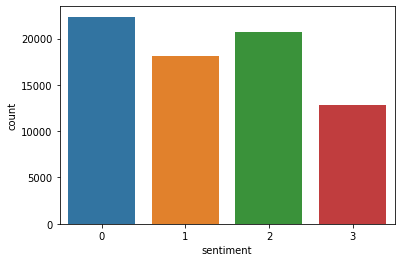

In [14]:
sns.countplot(data=df_train,
              x='sentiment')
plt.show()

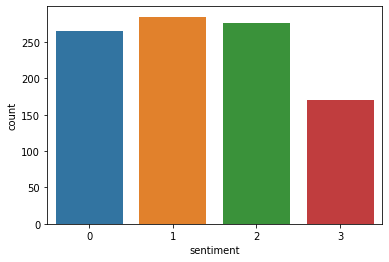

In [15]:
sns.countplot(data=df_test,
              x='sentiment')
plt.show()

## Define parameter

In [21]:
vocab_size = 5000
embedding_dim = 64
max_length = 128

trunc_type = 'post'
padding_type = 'post'

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df_train['text'], #data text
    df_train['sentiment'], #data label
    test_size=0.2,
    random_state=42
)

## Tokenization and build word index

In [22]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['text'])
word_index = tokenizer.word_index

In [23]:
dict(list(word_index.items())[0:10])

{'the': 1,
 'i': 2,
 'to': 3,
 'and': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'in': 8,
 'for': 9,
 'this': 10}

## Convert Text to Sequences

In [56]:
X_train

61022    i had a dream my girlfriend and i got married ...
33058    buy yo Alix or formula now am big big fan of i...
19839    I also just earned the [ Scrappy'S s Weekly Be...
74051    NVIDIA celebrates 40 years of Pac-Man with an ...
13578    Congratulations to the champions of Season 2 @...
                               ...                        
37541    Liked on YouTube: Hearthstone Felfire Festival...
6332                Not even gonna change the 7-2 loss ffs
55392                      Fuck this call of duty update..
864      I should get up & feed my dogs & stuff when th...
15956                      Welcome Miss The International!
Name: text, Length: 59196, dtype: object

In [24]:
# Data Train -> Data Train Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)

# Data Validation -> Data Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_val)

In [25]:
train_sequences[1]

[235,
 590,
 69,
 3095,
 37,
 120,
 224,
 224,
 543,
 6,
 11,
 52,
 531,
 239,
 295,
 3,
 67,
 8,
 5,
 2180,
 14,
 202,
 3893,
 120,
 1648,
 808,
 703,
 21]

In [28]:
len(train_sequences)

59196

In [39]:
# Data Train Sequences - Train Pad Sequences
train_padded = pad_sequences(train_sequences,
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type)

# Data Validation Sequences - Validation Pad Sequences
validation_padded = pad_sequences(validation_sequences,
                                  maxlen=max_length,
                                  padding=padding_type,
                                  truncating=trunc_type)

In [40]:
train_padded[1]

array([ 235,  590,   69, 3095,   37,  120,  224,  224,  543,    6,   11,
         52,  531,  239,  295,    3,   67,    8,    5, 2180,   14,  202,
       3893,  120, 1648,  808,  703,   21,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

# 1) LSTM

## Define Model (LSTM)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 394,564
Trainable params: 394,564
Non-trainable params: 0
_________________________________________________________________


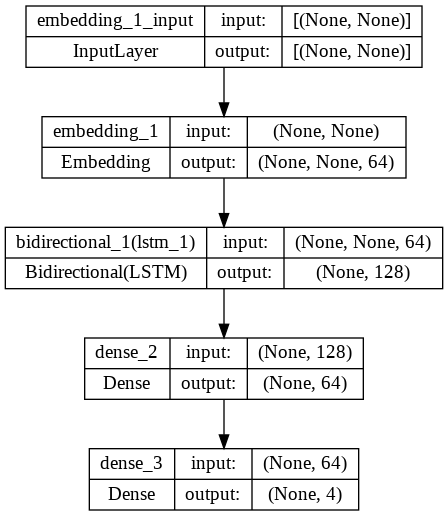

In [42]:
tf.keras.utils.plot_model(model,
                          show_shapes=True)

In [43]:
import timeit
start = timeit.default_timer()

In [44]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='auto',
    patience=2,
    restore_best_weights=True
)

num_epochs = 15

history = model.fit(
    train_padded,
    y_train,
    batch_size=128,
    epochs=num_epochs,
    callbacks=[early_stopping],
    validation_data=(validation_padded, y_val)
)

Epoch 1/15
463/463 [==============================] - 16s 28ms/step - loss: 0.9843 - accuracy: 0.5879 - val_loss: 0.7993 - val_accuracy: 0.6891
Epoch 2/15
463/463 [==============================] - 15s 32ms/step - loss: 0.6659 - accuracy: 0.7460 - val_loss: 0.6921 - val_accuracy: 0.7359
Epoch 3/15
463/463 [==============================] - 16s 34ms/step - loss: 0.5312 - accuracy: 0.7987 - val_loss: 0.6026 - val_accuracy: 0.7727
Epoch 4/15
463/463 [==============================] - 13s 28ms/step - loss: 0.4344 - accuracy: 0.8367 - val_loss: 0.5674 - val_accuracy: 0.7897
Epoch 5/15
463/463 [==============================] - 10s 22ms/step - loss: 0.3666 - accuracy: 0.8621 - val_loss: 0.5554 - val_accuracy: 0.8067
Epoch 6/15
463/463 [==============================] - 10s 21ms/step - loss: 0.3157 - accuracy: 0.8804 - val_loss: 0.5462 - val_accuracy: 0.8102
Epoch 7/15
463/463 [==============================] - 10s 21ms/step - loss: 0.2798 - accuracy: 0.8940 - val_loss: 0.5488 - val_accuracy:

In [45]:
stop = timeit.default_timer()
print('Time for Training: ', (stop - start) / 60, 'Menit')

Time for Training:  1.8110906626499854 Menit


## Model Evaluation (LSTM)

In [46]:
def plot_history(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])

  plt.xlabel('Epochs')
  plt.ylabel(string)

  plt.legend([string, 'val_'+string])
  plt.show()

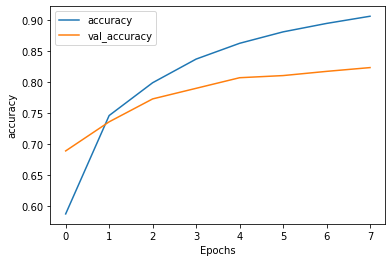

In [47]:
plot_history(history, 'accuracy')

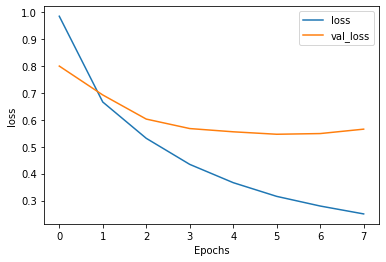

In [48]:
plot_history(history, "loss")

## Inference (LSTM)

In [50]:
test_sequences = tokenizer.texts_to_sequences(df_test['text'])
test_padded = pad_sequences(test_sequences,
                            maxlen=max_length,
                            padding=padding_type,
                            truncating=trunc_type)

prediction = np.argmax(model.predict(test_padded),
                       axis=1)

32/32 [==============================] - 1s 7ms/step


In [57]:
test_sequences[1]

[102, 70, 45, 2, 402, 9, 853, 57, 11, 19, 2610, 13, 14]

In [58]:
test_padded[1]

array([ 102,   70,   45,    2,  402,    9,  853,   57,   11,   19, 2610,
         13,   14,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

              precision    recall  f1-score   support

    Negative       0.94      0.94      0.94       266
     Neutral       0.91      0.94      0.92       278
    Positive       0.91      0.93      0.92       272
  Irrelevant       0.94      0.88      0.91       183

    accuracy                           0.92       999
   macro avg       0.93      0.92      0.92       999
weighted avg       0.92      0.92      0.92       999



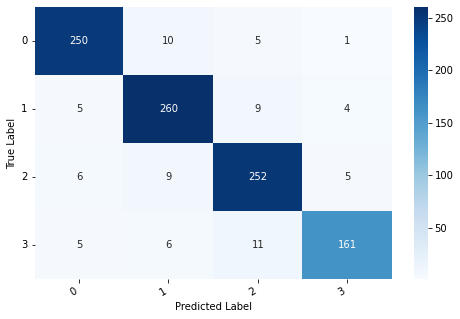

In [52]:
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(8,5))
  hmap = sns.heatmap(confusion_matrix,
                     annot=True,
                     fmt='d',
                     cmap='Blues')
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(),
                            rotation=0,
                            ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(),
                            rotation=30,
                            ha='right')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

print(classification_report(prediction,
                            df_test['sentiment'],
                            target_names=["Negative",
                                          "Neutral",
                                          "Positive",
                                          "Irrelevant"]))

cm = confusion_matrix(prediction,
                      df_test['sentiment'])
show_confusion_matrix(cm)

# 2) N-Gram Based Classification

Time for Training:  0.0005835746833326994 Menit
1-Gram



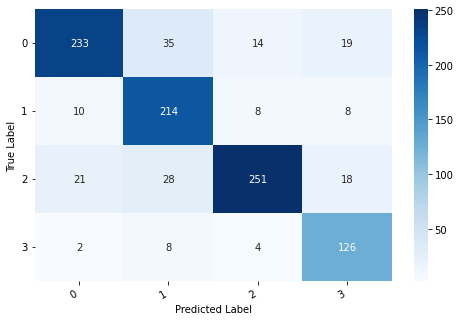


              precision    recall  f1-score   support

    Negative       0.88      0.77      0.82       301
     Neutral       0.75      0.89      0.82       240
    Positive       0.91      0.79      0.84       318
  Irrelevant       0.74      0.90      0.81       140

    accuracy                           0.82       999
   macro avg       0.82      0.84      0.82       999
weighted avg       0.84      0.82      0.83       999


Time for Training:  0.0010241502833196136 Menit
2-Gram



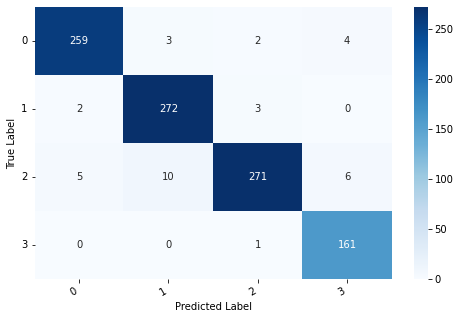


              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97       268
     Neutral       0.95      0.98      0.97       277
    Positive       0.98      0.93      0.95       292
  Irrelevant       0.94      0.99      0.97       162

    accuracy                           0.96       999
   macro avg       0.96      0.97      0.96       999
weighted avg       0.96      0.96      0.96       999


Time for Training:  0.0021497048166565945 Menit
3-Gram



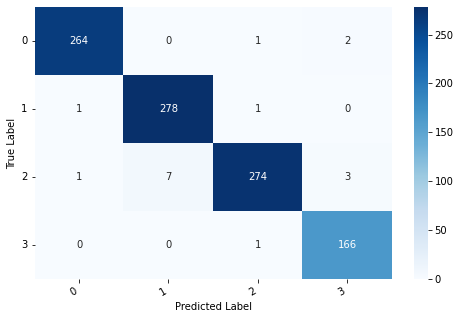


              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99       267
     Neutral       0.98      0.99      0.98       280
    Positive       0.99      0.96      0.98       285
  Irrelevant       0.97      0.99      0.98       167

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999


Time for Training:  0.003568737916672641 Menit
4-Gram



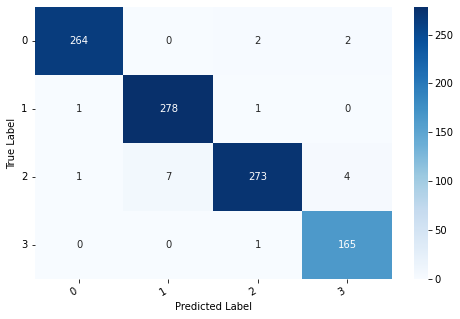


              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99       268
     Neutral       0.98      0.99      0.98       280
    Positive       0.99      0.96      0.97       285
  Irrelevant       0.96      0.99      0.98       166

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999




In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Train the models with different n-gram ranges
for N in range(1, 5):

  # Converts train data to N-Gram representation according to iteration
  cv = CountVectorizer(analyzer='word',
                       ngram_range=(1, N))
  X_train_cv = cv.fit_transform(df_train['text'])
  X_test_cv = cv.transform(df_test['text'])

  # Train the model and generate predictions
  start = timeit.default_timer()

  clf = MultinomialNB()
  clf.fit(X_train_cv, df_train['sentiment'])

  stop = timeit.default_timer()
  print('Time for Training: ', (stop - start) / 60, 'Menit')

  y_pred = clf.predict(X_test_cv)

  print(f'{N}-Gram\n')

  cm = confusion_matrix(y_pred,
                        df_test['sentiment'])
  show_confusion_matrix(cm)
  print('')

  print(classification_report(
      y_pred,
      df_test['sentiment'],
      target_names=["Negative",
                    "Neutral",
                    "Positive",
                    "Irrelevant"])
  )

  print('')

In [59]:
X_train_cv[1]

<1x1586022 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>